In [28]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np 
import os 
import pandas as pd 

In [29]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [30]:

def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [31]:
nRowsRead = 1000 
df1 = pd.read_csv('https://raw.githubusercontent.com/benvictoria17/DataVisualization/master/dataset/Quarterly%20Foreign%20Tourist%20Arrivals%20in%20India/q1.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'q1.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 12 rows and 42 columns


In [32]:
df1.head(5)

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f33,f34,f35,f36,f37,f38,f39,f40,f41,y
0,8338,7933,1463,1932,1426,676,3600,1375,1287,937,...,2958,2913,2112,1132,5754,2099,1854,1801,9393,1108967
1,9582,9107,1699,2182,1634,804,4106,1594,1468,1044,...,3115,3170,2324,1297,6399,2349,2123,1927,11910,1267443
2,11178,10658,1955,2635,2033,969,4755,1877,1742,1136,...,3273,3637,2704,1434,6986,2622,2420,1943,14407,1632324
3,12940,12340,2177,3039,2326,1152,5600,2184,2051,1365,...,3382,3922,2930,1544,7724,2908,2678,2138,14407,1632324
4,13678,13419,2469,3037,2289,1278,6299,2231,2433,1635,...,3435,3779,2777,1624,8301,2937,3047,2317,13300,1405614


<ipython-input-29-c4d51ae7f98d>:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)


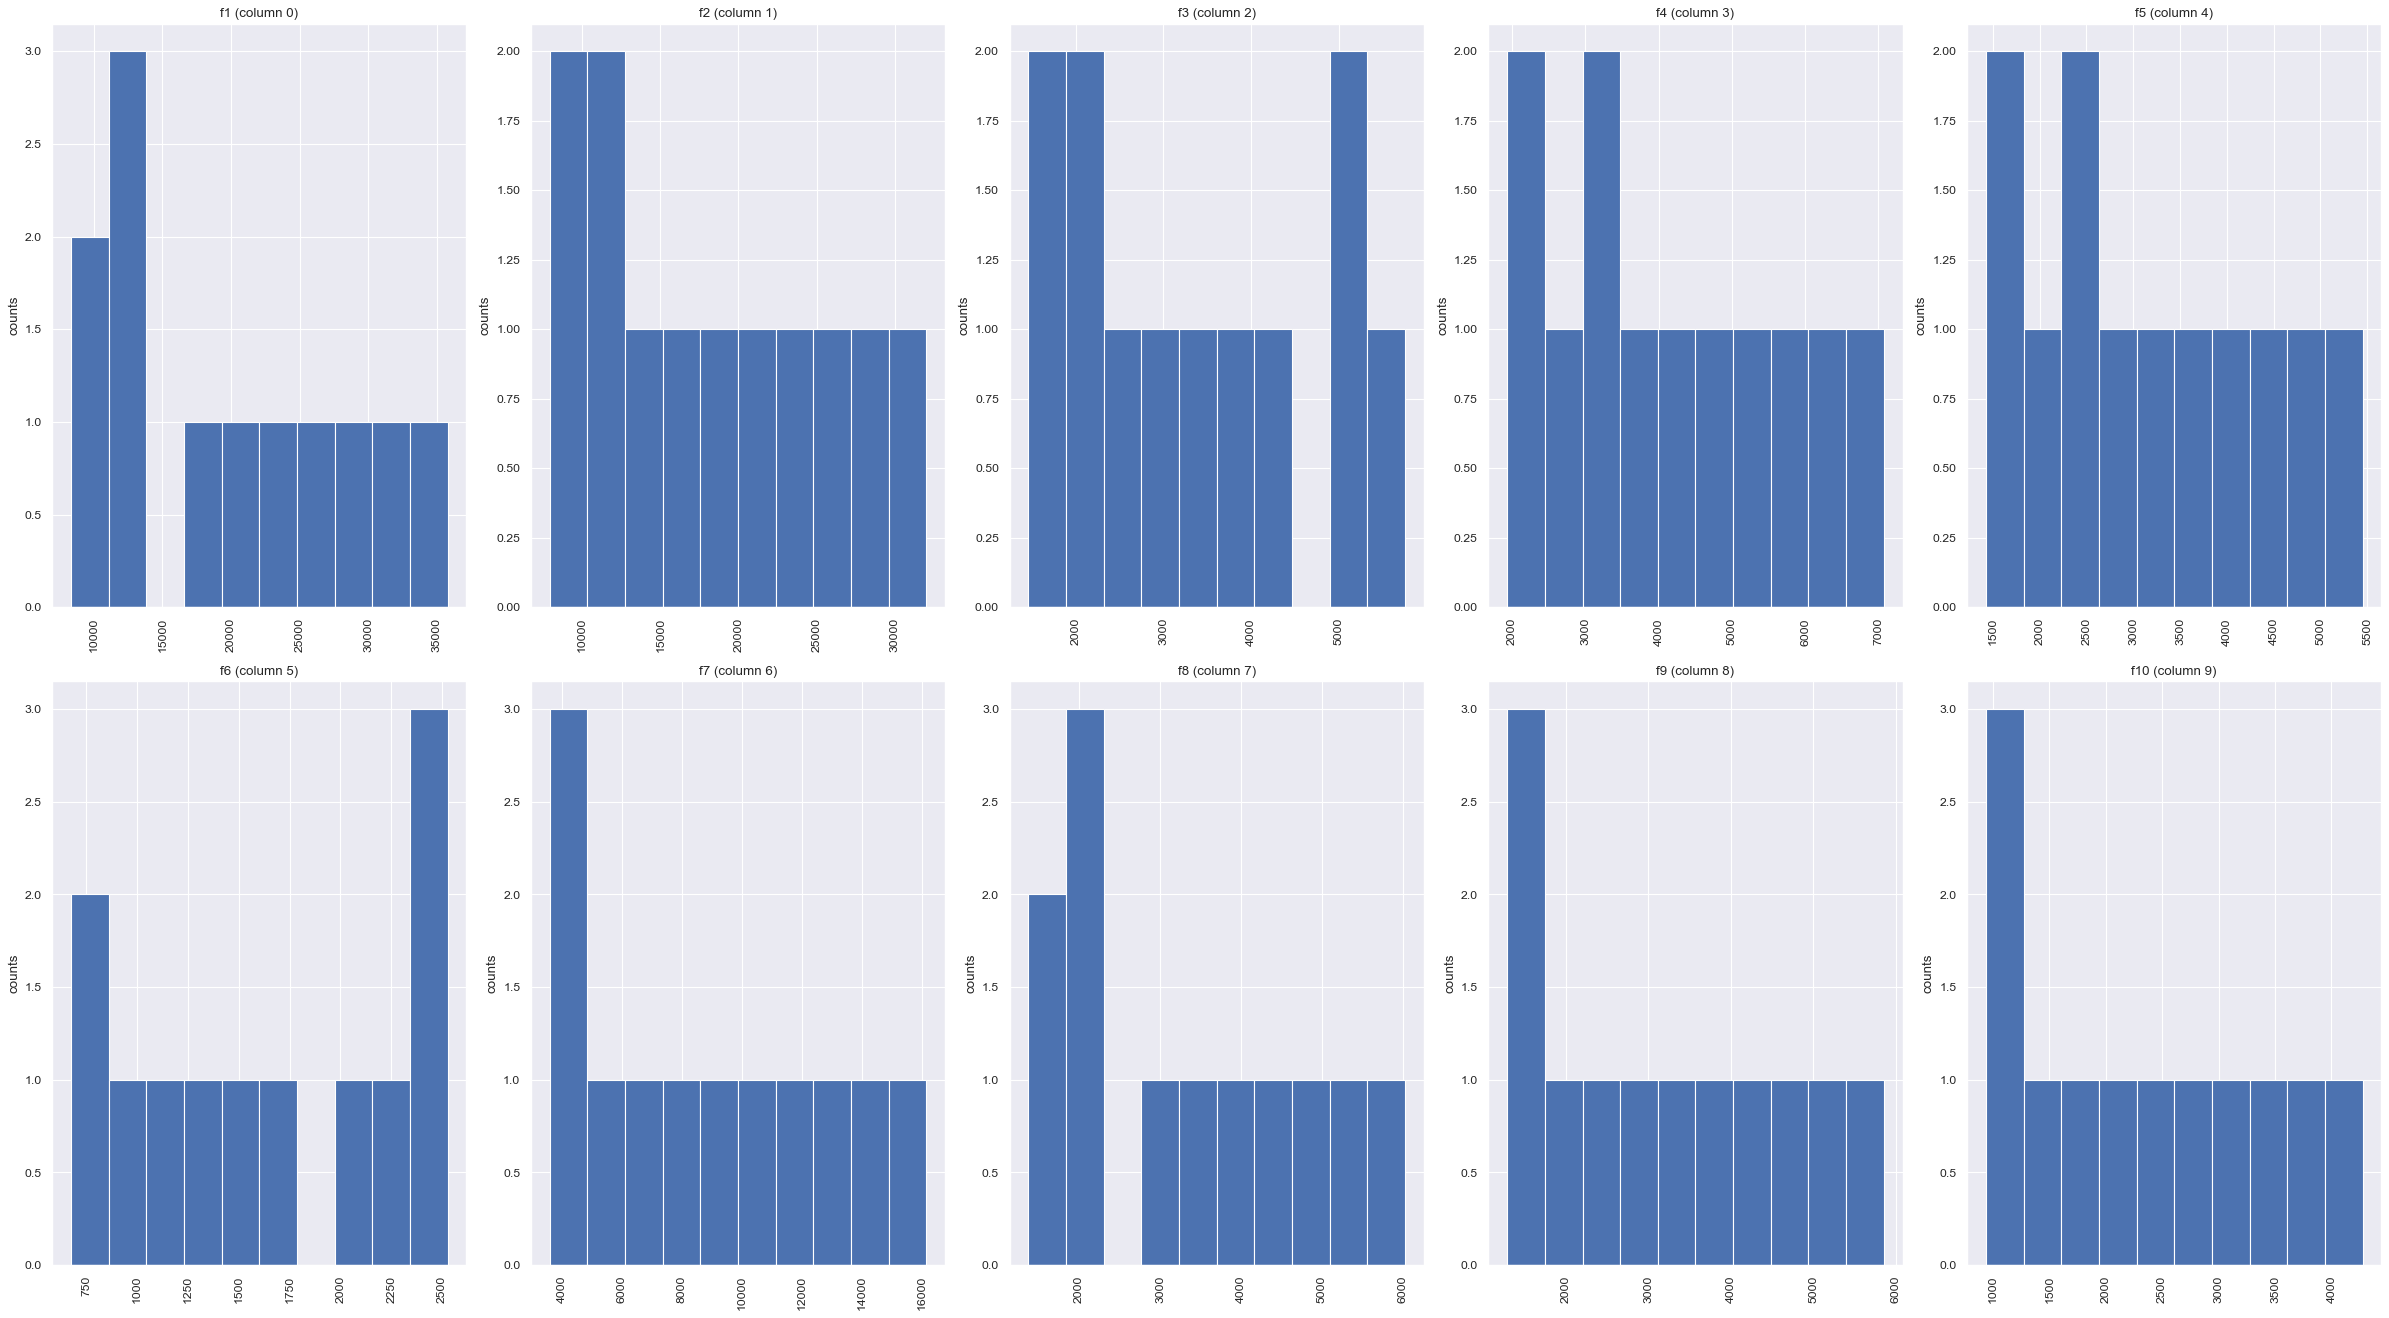

In [33]:
plotPerColumnDistribution(df1, 10, 5)

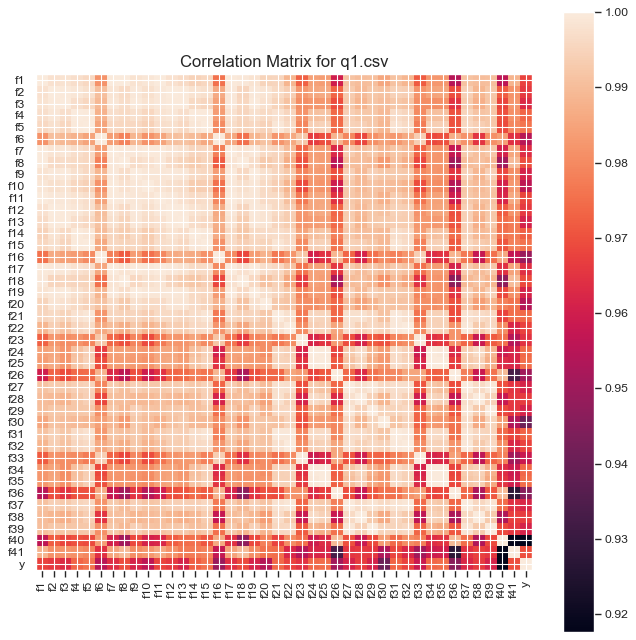

In [34]:
plotCorrelationMatrix(df1, 10)

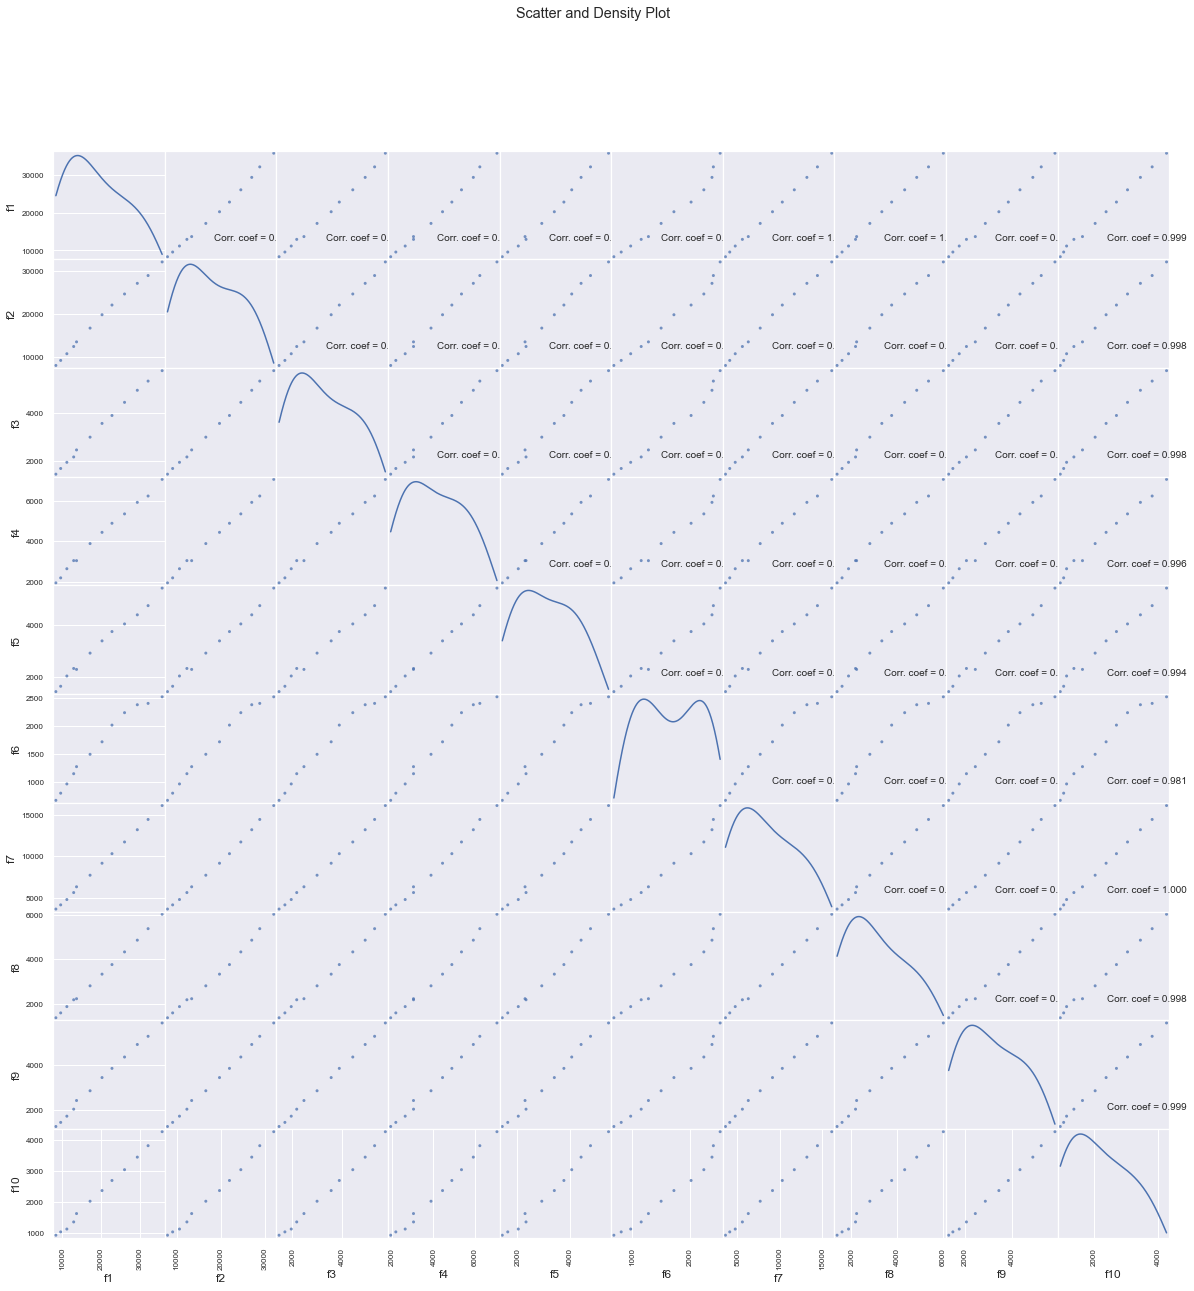

In [35]:
plotScatterMatrix(df1, 20, 10)

In [36]:
nRowsRead = 1000 # specify 'None' if want to read whole file
df2 = pd.read_csv('https://raw.githubusercontent.com/benvictoria17/DataVisualization/master/dataset/Quarterly%20Foreign%20Tourist%20Arrivals%20in%20India/q2.csv', delimiter=',', nrows = nRowsRead)
df2.dataframeName = 'q2.csv'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 12 rows and 42 columns


In [37]:
df2.head(5)

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f33,f34,f35,f36,f37,f38,f39,f40,f41,y
0,8641,7608,1517,1994,1480,699,3669,1424,1289,957,...,2778,2797,2017,1126,5375,1971,1900,1503,6257,721024
1,9877,8812,1721,2320,1740,837,4235,1645,1521,1069,...,2886,3106,2272,1253,5928,2174,2155,1599,7566,853856
2,11592,10343,2021,2691,2050,1018,4925,1923,1819,1184,...,3016,3444,2560,1399,6543,2448,2429,1667,8610,934997
3,13578,12416,2325,3165,2467,1236,5965,2321,2238,1406,...,3104,3794,2869,1528,7299,2779,2705,1815,10431,1030108
4,14626,13462,2543,3311,2512,1307,6718,2422,2519,1777,...,3123,3904,2927,1591,7996,2919,3029,2048,11209,997366


<ipython-input-29-c4d51ae7f98d>:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)


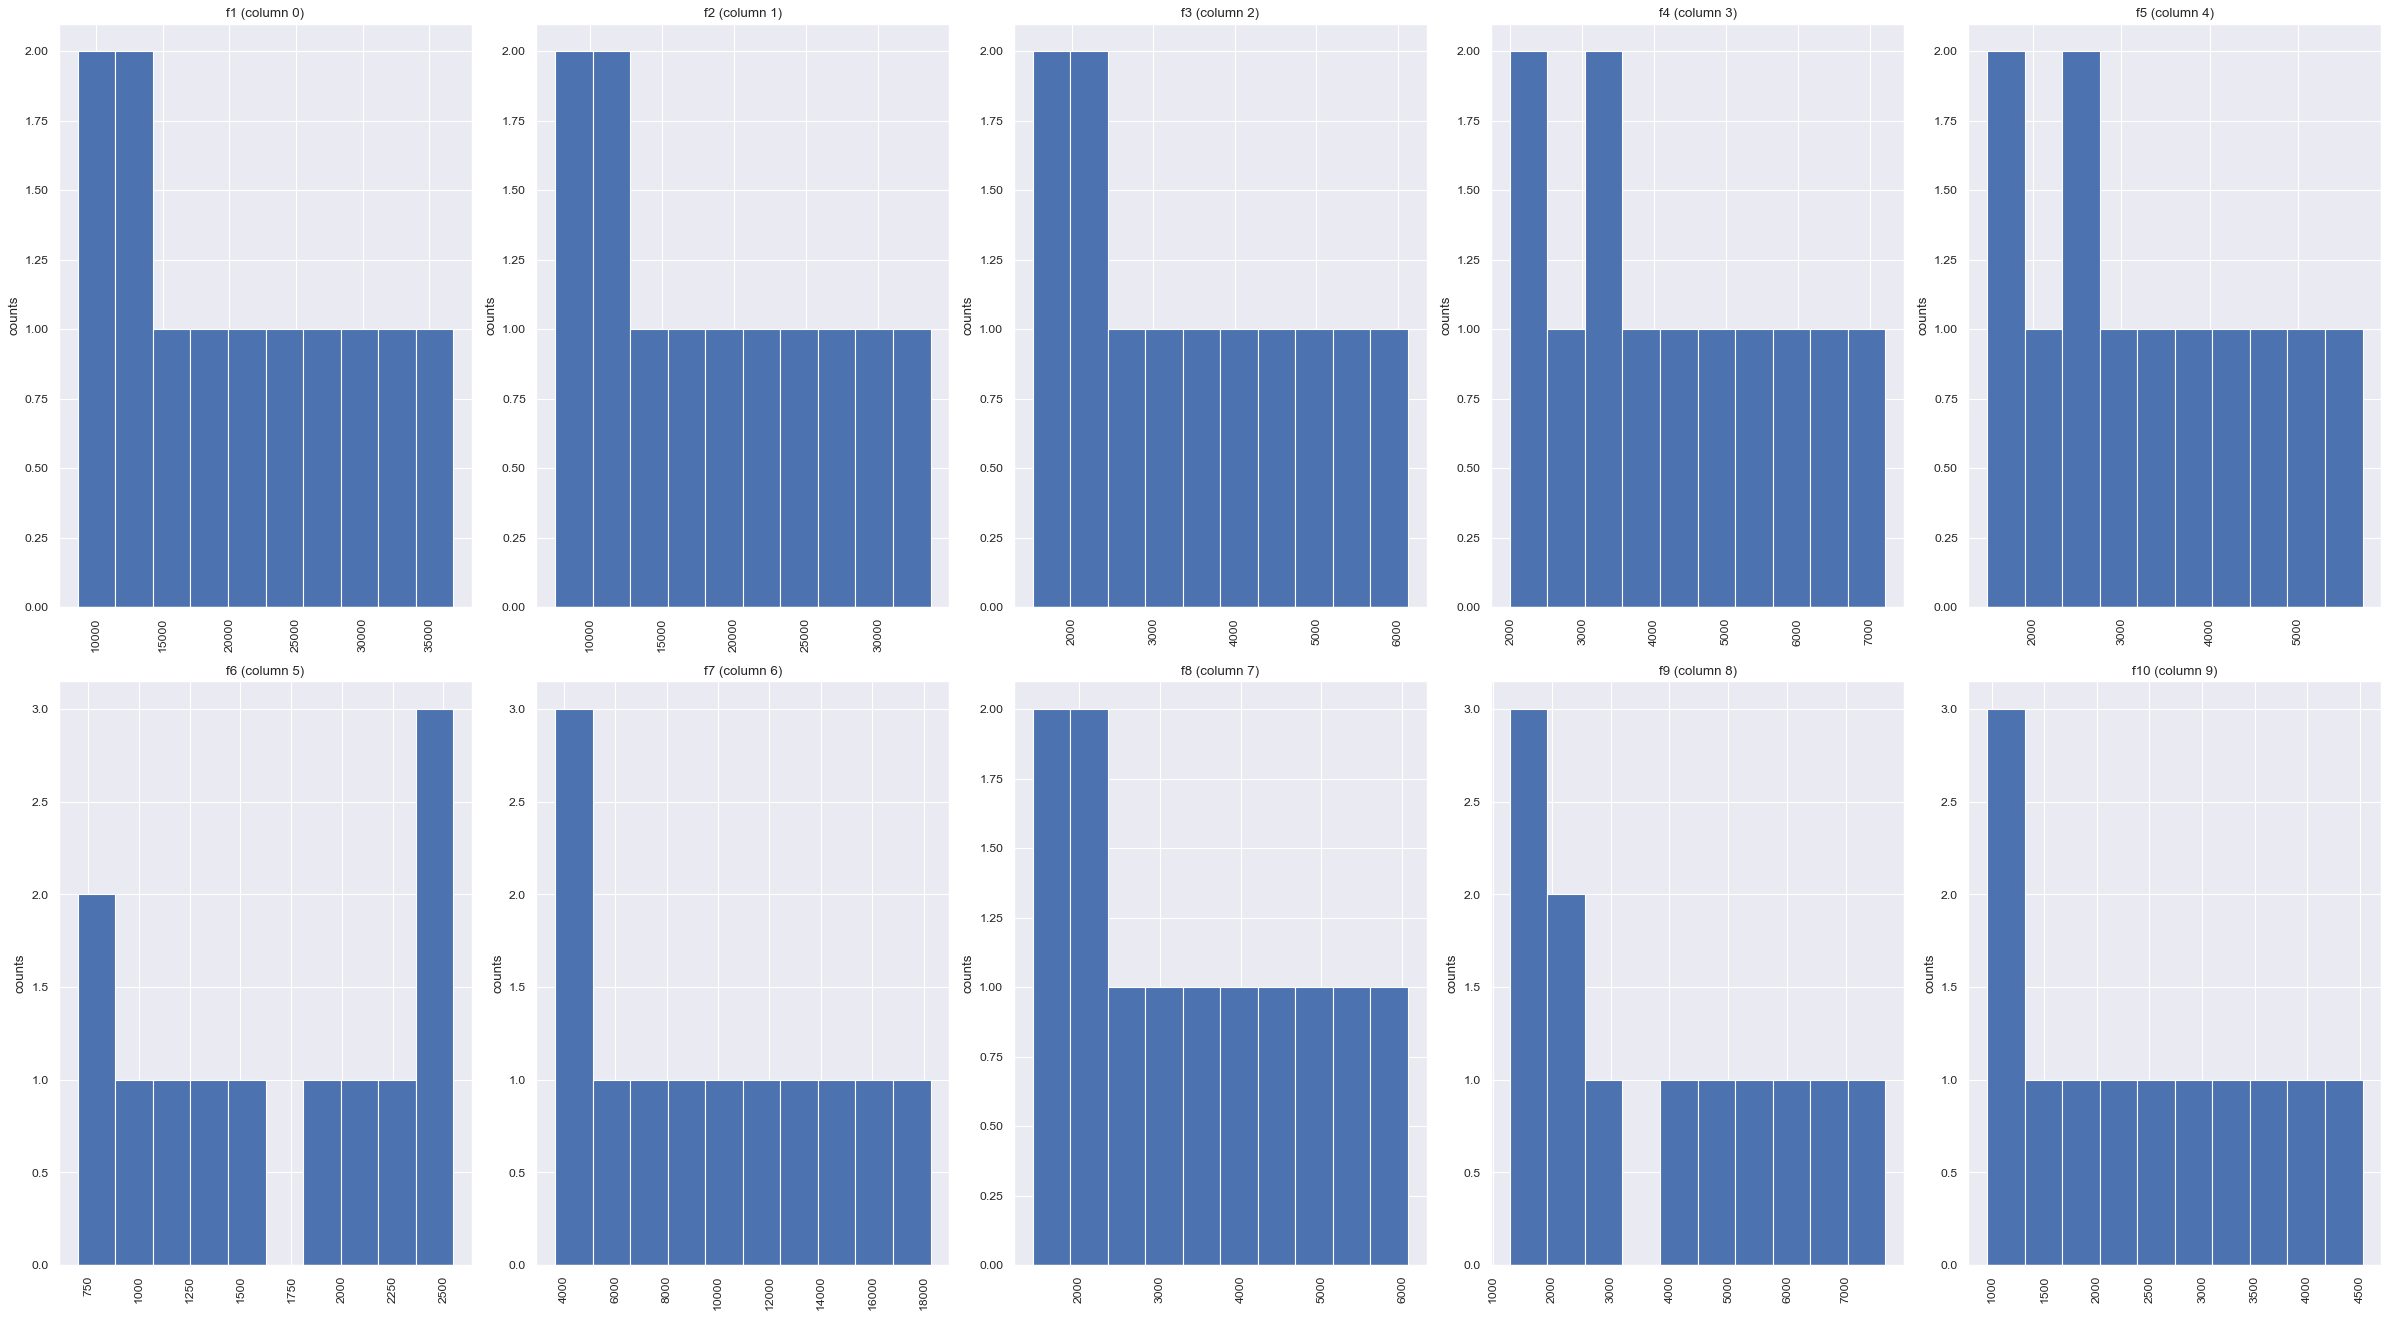

In [38]:
plotPerColumnDistribution(df2, 10, 5)

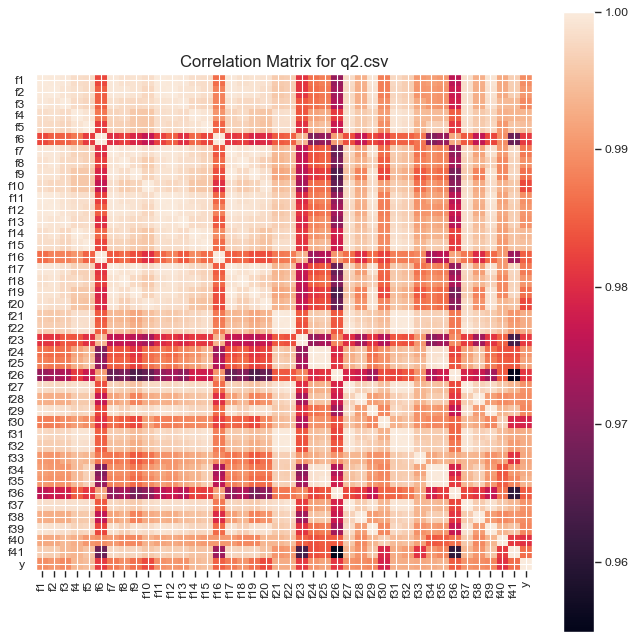

In [39]:
plotCorrelationMatrix(df2, 10)

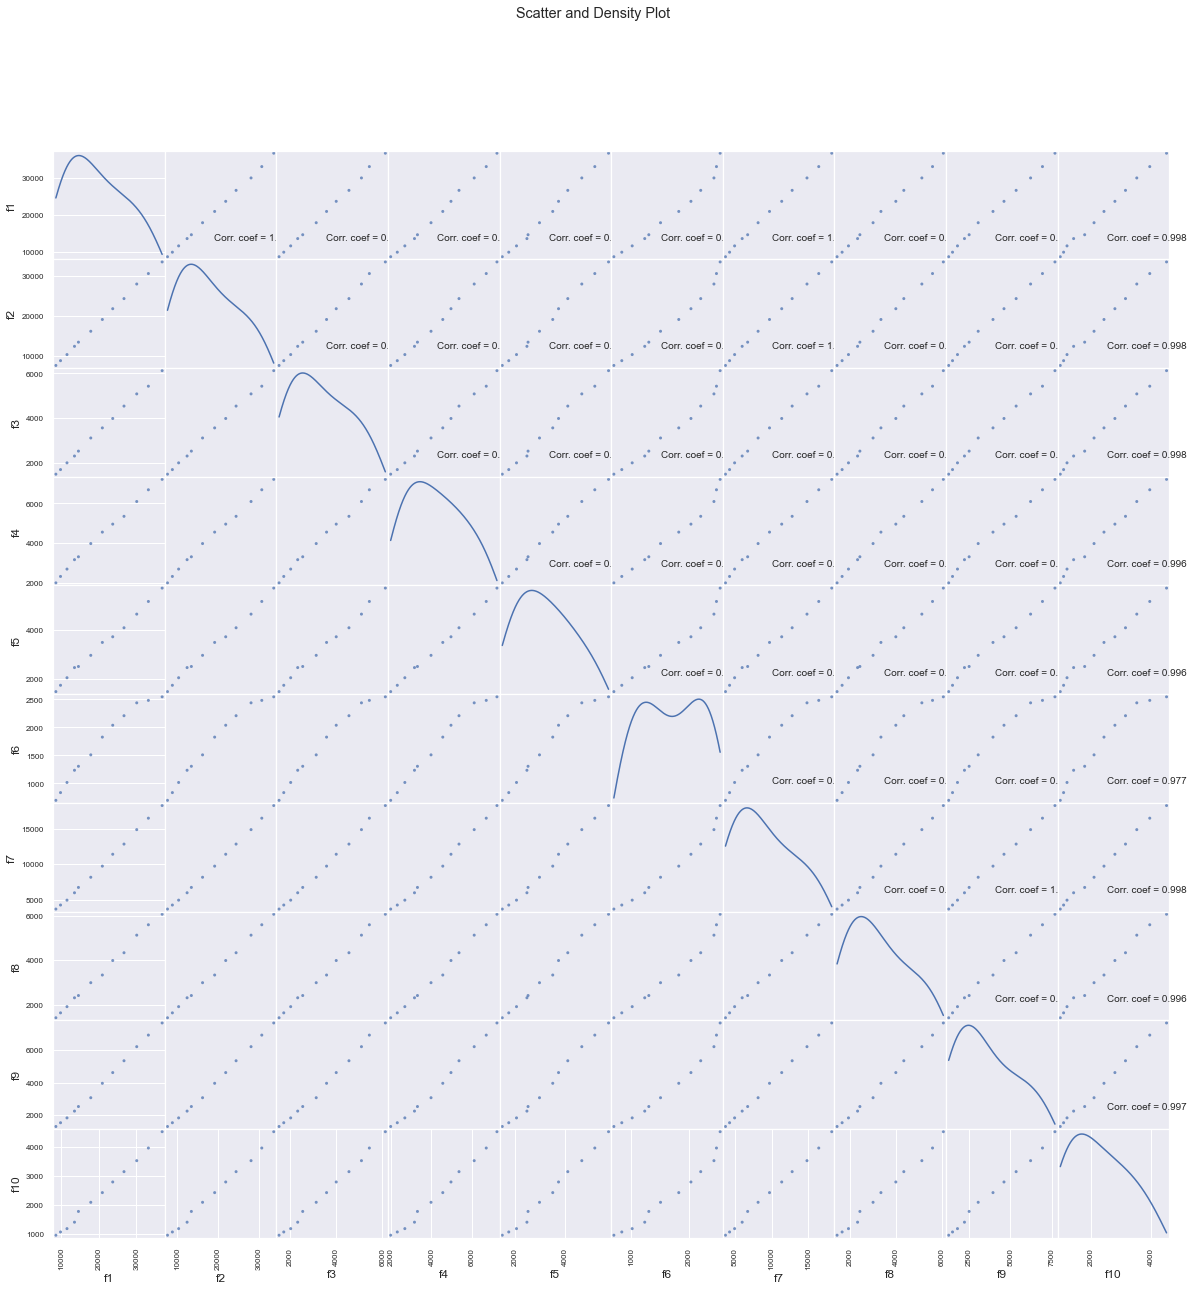

In [40]:
plotScatterMatrix(df2, 20, 10)

In [41]:
nRowsRead = 1000 # specify 'None' if want to read whole file
df3 = pd.read_csv('https://raw.githubusercontent.com/benvictoria17/DataVisualization/master/dataset/Quarterly%20Foreign%20Tourist%20Arrivals%20in%20India/q3.csv', delimiter=',', nrows = nRowsRead)
df3.dataframeName = 'q3.csv'
nRow, nCol = df3.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 12 rows and 42 columns


In [42]:
df3.head(5)

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f33,f34,f35,f36,f37,f38,f39,f40,f41,y
0,8861,7670,1582,2030,1516,725,3787,1469,1331,987,...,2253,2827,2077,1130,5608,2023,1934,1650,6964,838583
1,10411,8965,1788,2427,1845,871,4419,1745,1587,1087,...,2331,3185,2369,1247,6173,2268,2201,1704,8970,929458
2,11942,10337,2071,2781,2118,1064,5067,1975,1868,1224,...,2440,3492,2619,1421,6798,2495,2477,1826,9110,1062034
3,14101,12448,2371,3269,2514,1280,6185,2389,2333,1463,...,2467,3762,2851,1515,7532,2778,2748,2006,12196,1146325
4,15558,13950,2673,3570,2702,1367,7093,2578,2609,1906,...,2517,4057,3085,1597,8471,3020,3061,2389,13200,1126558


<ipython-input-29-c4d51ae7f98d>:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)


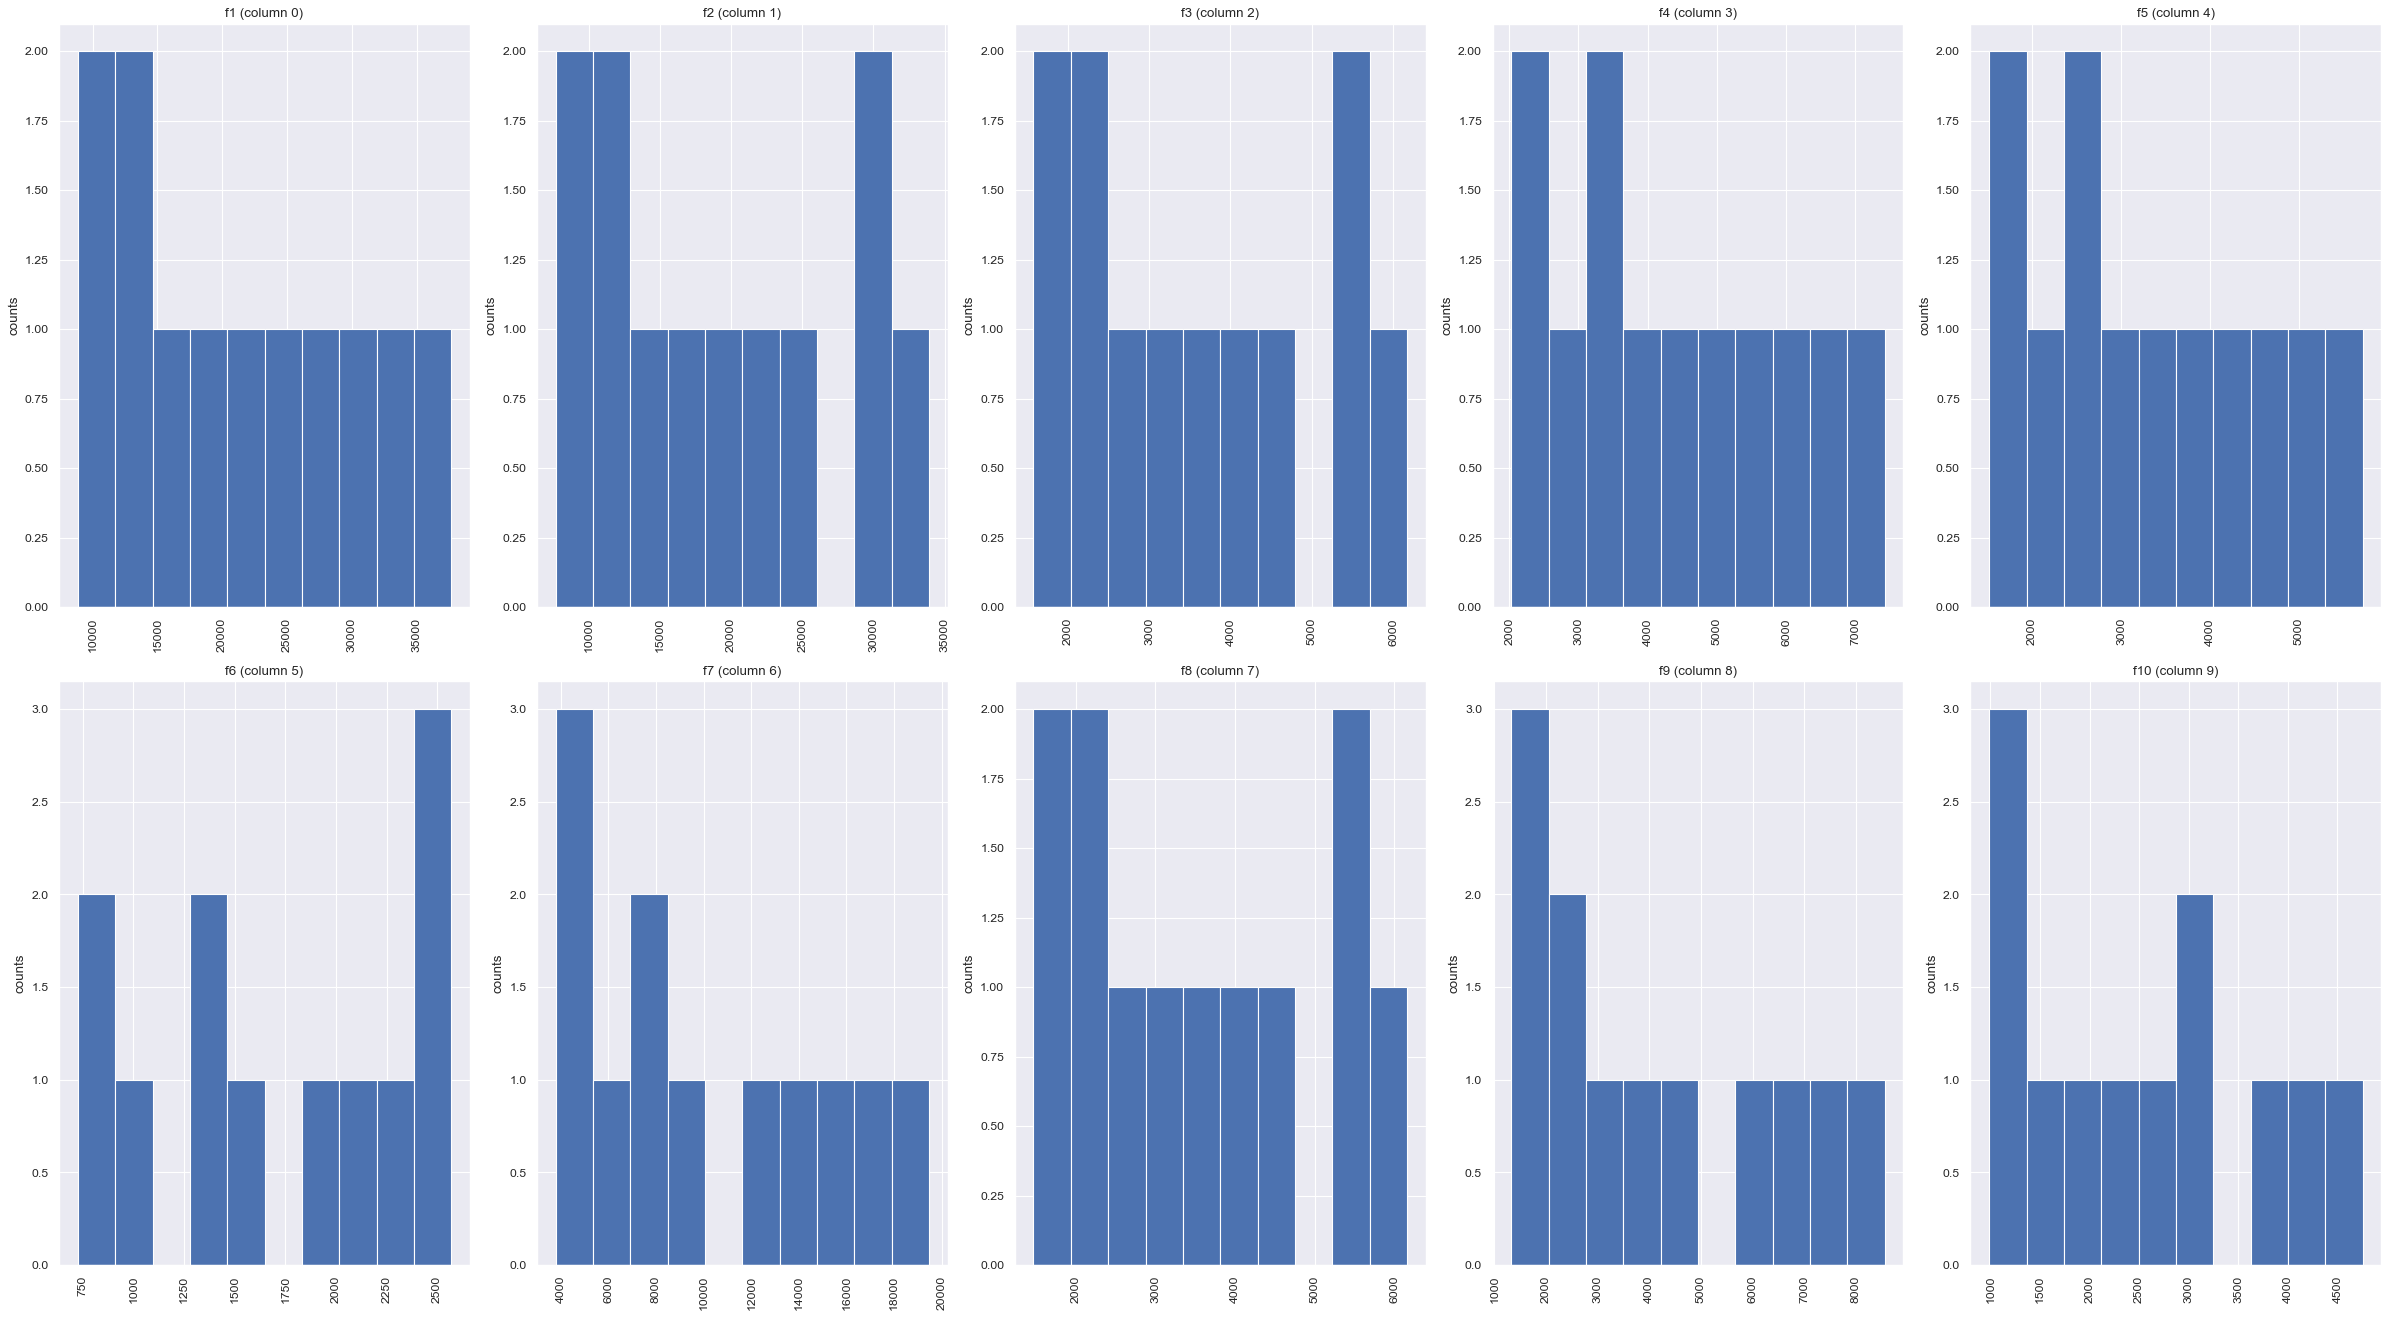

In [43]:
plotPerColumnDistribution(df3, 10, 5)

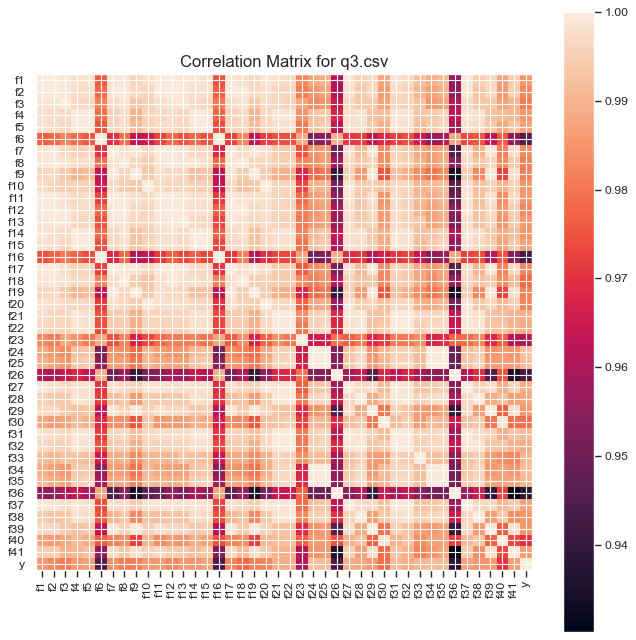

In [44]:
plotCorrelationMatrix(df3, 10)

In [ ]:
plotScatterMatrix(df3, 20, 10)